<a href="https://colab.research.google.com/github/Deepu2917/Customer-Refund-Likelihood-Predictor/blob/main/Customer_Refund_Likelihood_Predictor_for_QuickCart_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📘 Customer Refund Likelihood Predictor for QuickCart E-Commerce
print('Hello from YBI Foundation 🚀')

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Model & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [3]:
# Sample Dataset
data = {
    'order_id': range(1, 101),
    'order_value': np.random.randint(100, 10000, size=100),
    'delivery_days': np.random.randint(1, 15, size=100),
    'customer_age': np.random.randint(18, 70, size=100),
    'previous_refunds': np.random.randint(0, 5, size=100),
    'payment_mode': np.random.choice(['Credit Card', 'Debit Card', 'COD', 'UPI'], size=100),
    'is_return': np.random.choice([0, 1], size=100, p=[0.7, 0.3])  # Slight class imbalance
}

df = pd.DataFrame(data)
df.head()

,order_id,order_value,delivery_days,customer_age,previous_refunds,payment_mode,is_return
0,1,7659,6,44,1,COD,1
1,2,3134,4,27,1,UPI,0
2,3,974,9,20,1,UPI,0
3,4,3015,5,26,1,COD,0
4,5,6605,9,19,0,Debit Card,0


Text(0.5, 1.0, 'Refund Distribution')

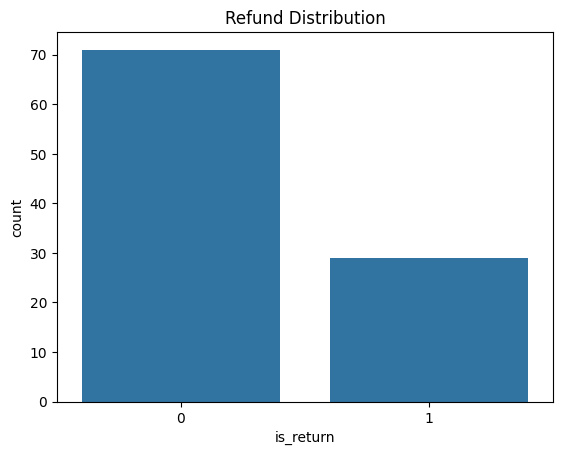

In [4]:
# Check distribution
sns.countplot(data=df, x='is_return')
plt.title("Refund Distribution")

<Axes: >

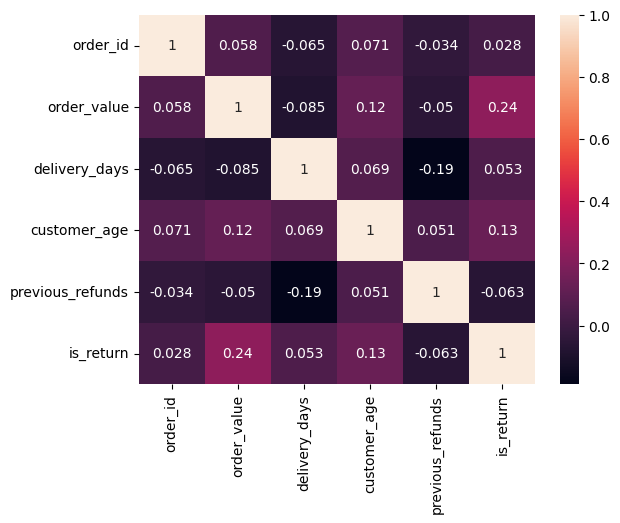

In [5]:
# Correlation heatmap
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

In [6]:
# One-hot encode payment_mode
df_encoded = pd.get_dummies(df, columns=['payment_mode'], drop_first=True)


In [7]:
# Features and target
X = df_encoded.drop(['is_return', 'order_id'], axis=1)
y = df_encoded['is_return']

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:

# Predictions
y_pred = model.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        23
           1       1.00      0.14      0.25         7

    accuracy                           0.80        30
   macro avg       0.90      0.57      0.57        30
weighted avg       0.84      0.80      0.74        30



Text(0.5, 1.0, 'Confusion Matrix')

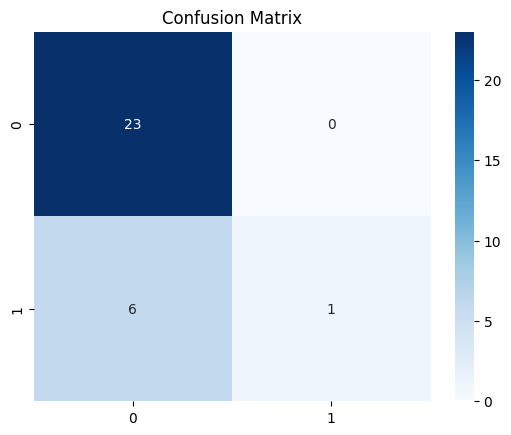

In [11]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")

Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        23
           1       1.00      0.14      0.25         7

    accuracy                           0.80        30
   macro avg       0.90      0.57      0.57        30
weighted avg       0.84      0.80      0.74        30



Text(0.5, 1.0, 'Confusion Matrix')

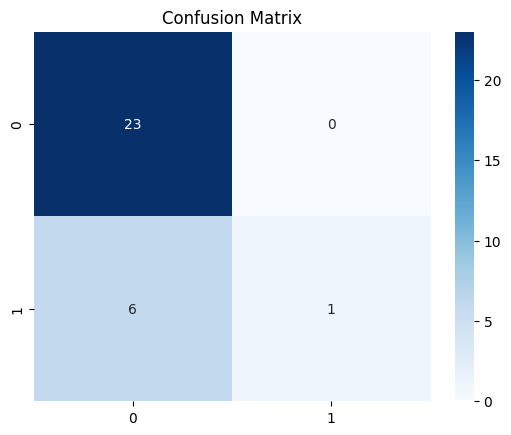

In [12]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")